In [22]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [23]:
data = pd.read_csv('C:/Users/MalaniR/Downloads/BNB 5 Year prices.csv', index_col='Date')

In [24]:
data.shape

(1827, 5)

In [25]:
data.head()

,Close,Open,High,Low,Vol.
Date,,,,,
15/04/2018,13.10,13.27,13.62,12.90,3.85M
16/04/2018,12.23,13.10,13.10,12.01,2.71M
17/04/2018,11.74,12.23,12.48,11.67,2.44M
18/04/2018,12.30,11.74,12.44,11.51,2.74M
19/04/2018,12.35,12.30,12.43,12.05,2.40M


In [26]:
data.tail()

,Close,Open,High,Low,Vol.
Date,,,,,
11/04/2023,322.21,318.59,333.00,317.80,686.32K
12/04/2023,319.80,322.21,323.21,316.81,368.20K
13/04/2023,324.60,319.90,324.80,317.81,359.08K
14/04/2023,328.80,324.60,335.31,323.41,705.88K
15/04/2023,333.00,328.81,334.50,327.01,425.45K


In [27]:
future_days = 90

In [28]:
# Create a new column
data[str(future_days)+'_Day_Price_Forecast'] = data[['Close']].shift(-future_days)

# Show the data
data[['Close',str(future_days)+'_Day_Price_Forecast']]

,Close,90_Day_Price_Forecast
Date,,
15/04/2018,13.10,12.09
16/04/2018,12.23,12.30
17/04/2018,11.74,13.38
18/04/2018,12.30,13.72
19/04/2018,12.35,12.87
...,...,...
11/04/2023,322.21,NaN
12/04/2023,319.80,NaN
13/04/2023,324.60,NaN


In [29]:
X = np.array(data[['Close']])
X = X[:data.shape[0]-future_days]
print(X)

[[ 13.1 ]
 [ 12.23]
 [ 11.74]
 ...
 [293.7 ]
 [305.2 ]
 [302.1 ]]


In [30]:
y = np.array(data[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[ 12.09  12.3   13.38 ... 324.6  328.8  333.  ]


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

In [32]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [33]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.6821428791472004


In [34]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[ 2.99124663e+02  3.88948584e+02  1.86229515e+01  4.08090158e+01
  3.06875250e+02  2.89942814e+01  2.89266485e+02  4.60603872e+01
  1.18842158e+01  1.35212450e+01  3.06367453e+02  1.58676540e+01
  3.04403948e+02  3.20438150e+02  3.88223854e+02  1.61292480e+01
  3.77275087e+01  3.02027725e+02  1.60474812e+01  2.87388356e+02
  3.82712428e+02  2.72639935e+01  1.12702085e+01  2.36881672e+01
  1.64237489e+01  2.84729046e+01 -5.11002370e-01  1.56389023e+01
  6.87475912e+00  3.09342168e+02  3.14528042e+02  2.13635078e+01
  2.08503919e+01 -1.10136615e+00  2.99969943e+02  1.35212450e+01
  3.15271484e+02  3.20549848e+02  1.46763558e+01  3.72750786e+02
  3.20563407e+02  3.19402649e+02  2.67946383e+01  1.93806200e+01
  3.53510890e+02  1.53776359e+01  4.45588477e+01  6.24309597e+01
  7.43303557e+00  3.79677705e+02  1.96609732e+01  3.44281357e+02
  2.46213312e+01  1.94795470e+01  6.63578978e+00  1.56225680e+01
  4.04659470e+01  1.20136142e+01  4.20110456e+01  1.66365801e+01
  3.66340637e+02  3.08770

In [35]:
print(y_test)

[370.06 371.9   17.43  41.88 277.49  28.07 271.31  15.91  15.4   10.56
 305.2   19.63 245.9  529.52 413.67  19.93 254.26 293.7   13.71 390.97
 462.28  27.03  15.91  17.46  28.18  15.16  14.58  16.55   5.86 278.91
 484.91  17.62  17.31  15.1  347.15  16.84 404.19 392.64  13.8  436.31
 528.2  477.83  17.14  27.69 321.8   16.84  21.1  562.49   4.55 394.2
  30.66 287.7   14.55  16.62   7.04  17.26  20.4    9.89  42.43  21.37
 233.69 488.1  332.41  27.45  43.64 240.8   33.52 549.61  29.17  13.34
   9.64 416.82  24.28  18.93  18.17   9.55 329.39   9.28 133.07  12.11
 261.3  450.3  277.    28.38 231.72   9.68  22.59  10.14  14.11  18.76
   6.09 633.28 440.43  33.3   45.78 290.86 600.3   14.29  29.44  22.92
 238.4   35.12  14.96 316.72  17.98  41.78 323.19  16.29 270.49 421.69
 281.6   33.59   9.59  22.55 367.41  21.21 444.6  296.2  279.45 303.25
  23.18  32.51 634.24 497.4  240.85 427.38  16.58  19.2   27.71  13.56
 514.22  23.5   13.72  23.07 557.6   27.66 607.31  17.   329.31  15.95
  28.58

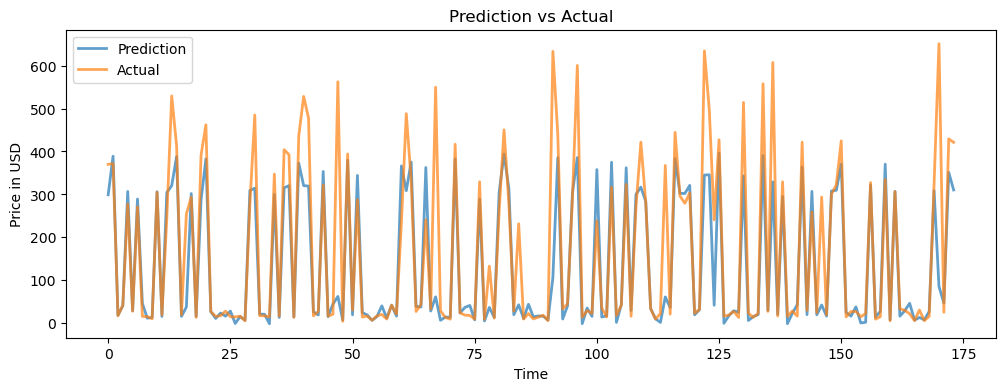

In [36]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label = 'Prediction', lw=2, alpha=0.7)
plt.plot(y_test, label='Actual', lw=2, alpha=0.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()

In [37]:
import math
from sklearn.metrics import mean_squared_error

In [38]:
math.sqrt(mean_squared_error(svm_prediction, y_test))

107.52133284704267

In [39]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(y_test, svm_prediction)
print("Mean absolute error : " + str(error))

Mean absolute error : 50.06549776768298


In [40]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
error_MAPE= MAPE(y_test, svm_prediction)
print("MAPE: ", error_MAPE)

MAPE:  0.3643472225069691


In [41]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error2 = mean_absolute_percentage_error(y_test, svm_prediction)
print("MAPE: ", error2)

MAPE:  36.43472225069691
